# Decision Tree

In [179]:
import sklearn

In [180]:
sklearn.__version__

'1.0.2'

In [181]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [182]:
#from sklearn import datasets
#diabetes_X,diabetes_y = datasets.load_breast_cancer(return_X_y = True , as_frame = True)
#diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y = True , as_frame = True)
#the X,y data is converted to a dataframe and series respectively

In [183]:
# load_boston() returns sklearn.utils.Bunch
from sklearn import datasets
breast_cancer_ds = datasets.load_breast_cancer()
# boston_data.data is a 2D array
# boston_data.feature_names is an array of columns labels
df_breastcanser = pd.DataFrame(breast_cancer_ds.data, columns=breast_cancer_ds.feature_names)
# Adding a Target column to DF
df_breastcanser['target'] = pd.Series(breast_cancer_ds.target)
df_breastcanser.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [184]:
df_breastcanser.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


### Data Visualization

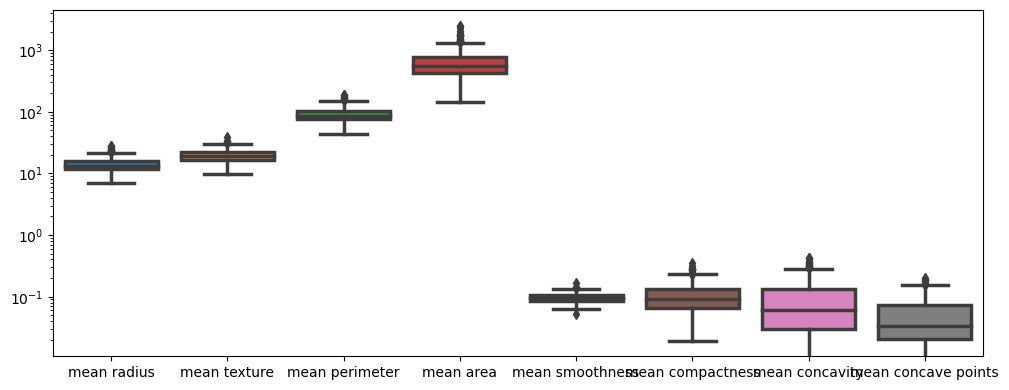

In [185]:
df =df_breastcanser
df_first_eight = df.iloc[ : , 0:8]
# To check outliers 
import matplotlib.pyplot as plt
a4_dims = (12, 4.5)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df_first_eight,linewidth=2.5,ax=ax)
g.set_yscale("log")

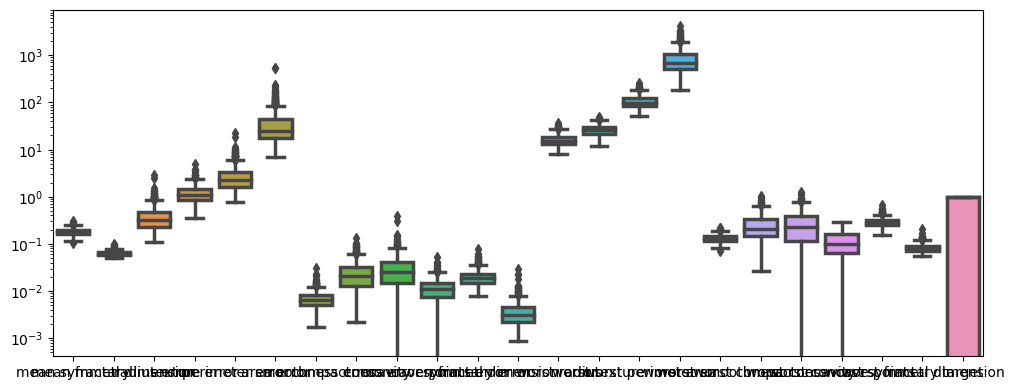

In [186]:
df =df_breastcanser
df_after_eight = df.iloc[ : , 8:]
# To check outliers 
import matplotlib.pyplot as plt
a4_dims = (12, 4.5)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df_after_eight,linewidth=2.5,ax=ax)
g.set_yscale("log")

<AxesSubplot:>

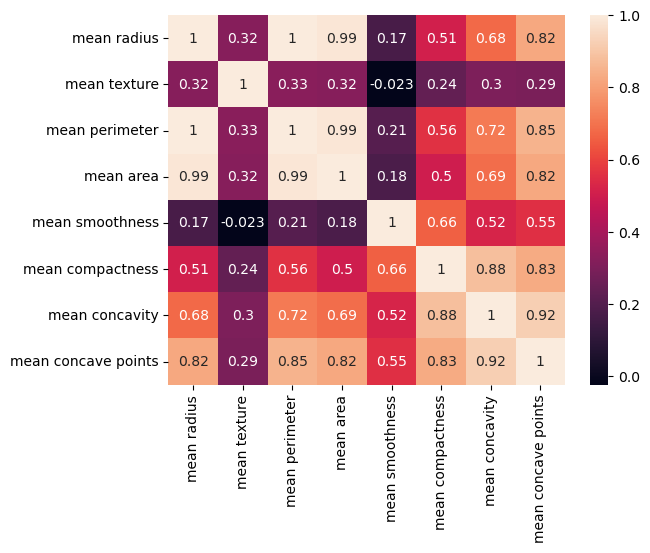

In [187]:
relation =df_first_eight.corr()
relation_index=relation.index
sns.heatmap(df[relation_index].corr(),annot=True)

In [188]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [189]:
print(df.shape)
df.tail()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

In [191]:
X = df.iloc[ : ,  0: -1]
y = df.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print((y_test.shape))
#0.9210526315789473

(455, 30)
(114, 30)
(455,)
(114,)


In [192]:
X.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [193]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier( random_state = 2)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
# Checking accuracy
y_pred = clf.predict(X_test)
y_pred
accuracy = accuracy_score(y_test,y_pred)
accuracy
# 0.9210526315789473

0.9122807017543859

In [194]:
avg_precision = average_precision_score(y_test,y_pred)
avg_precision

0.9261680771978256

In [195]:
class_report=classification_report(y_test,y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.84      0.96      0.90        45\n           1       0.97      0.88      0.92        69\n\n    accuracy                           0.91       114\n   macro avg       0.91      0.92      0.91       114\nweighted avg       0.92      0.91      0.91       114\n'

In [196]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[43,  2],
       [ 8, 61]], dtype=int64)

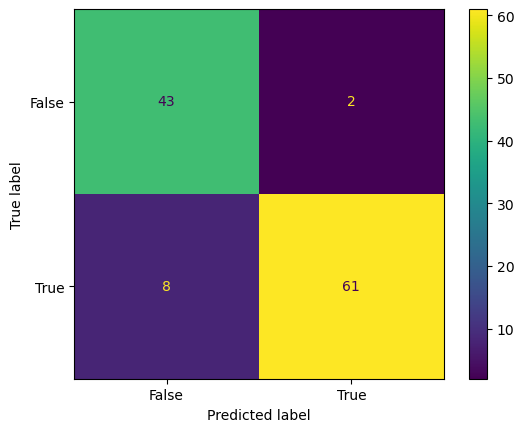

In [197]:
# To show the confusion matrix 
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= [False, True])
cm_display.plot()
plt.show()

[Text(0.6907894736842105, 0.9285714285714286, 'X[22] <= 105.95\ngini = 0.465\nsamples = 455\nvalue = [167, 288]'),
 Text(0.4868421052631579, 0.7857142857142857, 'X[27] <= 0.158\ngini = 0.088\nsamples = 282\nvalue = [13, 269]'),
 Text(0.34210526315789475, 0.6428571428571429, 'X[27] <= 0.135\ngini = 0.043\nsamples = 273\nvalue = [6, 267]'),
 Text(0.21052631578947367, 0.5, 'X[13] <= 46.315\ngini = 0.015\nsamples = 260\nvalue = [2, 258]'),
 Text(0.10526315789473684, 0.35714285714285715, 'X[21] <= 33.27\ngini = 0.008\nsamples = 257\nvalue = [1, 256]'),
 Text(0.05263157894736842, 0.21428571428571427, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(0.15789473684210525, 0.21428571428571427, 'X[21] <= 33.56\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.10526315789473684, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21052631578947367, 0.07142857142857142, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.3157894736842105, 0.35714285714285715, 'X[2]

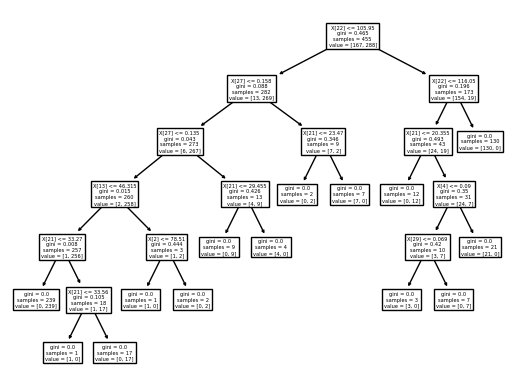

In [198]:
sklearn.tree.plot_tree(clf)

### Adjusting Hyper Parameter

###### Creteria    Gini Score/ Gini Index

Gini Index is the cost/loss function that is used by decision trees to choose which feature will be used for splitting the data, and at what point the column should be split.

The default criteria is Gini . 

###### Lower Gini Score⟺Lower Cost⟺Good Split

A perfect split with only two features and two classes has Gini Index = 0.

###### Creteria Entropy

Entropy measures the randomness or disorders in a system. In terms of data, we can define it as the randomness in the information we are processing. The higher the randomness, the higher the entropy. Hence, harder to conclude from that information. Mathematically, we calculate entropy as:

######  Mathematically we calculate Entropy:-

entropy=−∑i=1kP(valuei).log2(P(valuei))

###### Information gain

Information gain (IG) measures the amount of information provided by a given feature or attribute about a particular target class. While creating a decision tree, our goal is to find the attribute having the highest Information Gain, and conversely, the lowest entropy. 

###### Mathematically we calculate IG:-
    
Igain=Entropybefore split−Entropyafter split

###### If we use Information Gain as a criterion, we assume that our attributes are categorical, and as per Gini index, we assume that our attributes are continuous. 

###### Max Depth

This argument represents the maximum depth of a tree. If not specified, the tree is expanded until the last leaf nodes contain a single value. 

The lower value will give your under fitting (poor result in test), the higher value will give you over fitting (the poor result in test)

In [199]:
# Previous Max Depth Check
clf.max_depth

In [200]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 2) # The lesser Max Depth will give lesser accuracy in Test
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred
accuracy = accuracy_score(y_test,y_pred)
accuracy
# 0.9210526315789473  ====== Previous Accuracy 

0.9122807017543859

###### Max leaf nodes

This hyperparameter caps the number of leaf nodes in a decision tree. It will allow the branches of a tree to have varying depths, another way to control the model’s complexity.
The lower value will give your under fitting (poor result in test), the higher value will give you over fitting (the poor result in test)

In [206]:
# Previous Max Leaf Nodes Check  ===  Default Max Leaf Nodes is None
clf.max_leaf_nodes

3

In [205]:
clf = DecisionTreeClassifier(max_leaf_nodes = 3, random_state = 2) # The lesser Max Depth will give lesser accuracy in Test
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred
accuracy = accuracy_score(y_test,y_pred)
accuracy
# 0.9210526315789473  ====== Previous Accuracy 

0.8771929824561403

## Create Hyper Parameter Dictionary

In [221]:
# Accuracy without hyper parameter - 
clf = DecisionTreeClassifier(random_state = 2) 
clf = clf.fit(X_train,y_train)
X = df.iloc[ : ,  0: -1]
y = df.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 7)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy without Hyper Parameter tuning : ' , accuracy)
#0.9210526315789473

Accuracy without Hyper Parameter tuning :  0.9035087719298246


#### Parameter in Dictionary
 criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,

In [222]:
param_dist= {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,3,4,5,6,7,None],
    'min_samples_split' : [4,5,6,7],
    'max_features' : [6,7,8]
}

In [223]:
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
 'min_samples_split': [4, 5, 6, 7],
 'max_features': [6, 7, 8]}

#### Grid Search CV

In [224]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(clf ,param_grid = param_dist, n_jobs=1, cv = 4 )

In [229]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=2), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [6, 7, 8],
                         'min_samples_split': [4, 5, 6, 7]})

In [230]:
grid_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       min_samples_split=4, random_state=2)

In [232]:
grid_cv.best_score_ 

0.9494449619624282

###### Now, find the best accuracy with best parameters

In [233]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, max_features=7, min_samples_split=4, random_state=2)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [234]:
#accuracy_score(y_true, y_pred, normalize=False)
grid_search_cv_accuracy = accuracy_score(y_test,y_pred)
print('Grid Search CV : ', grid_search_cv_accuracy)

Grid Search CV :  0.9736842105263158


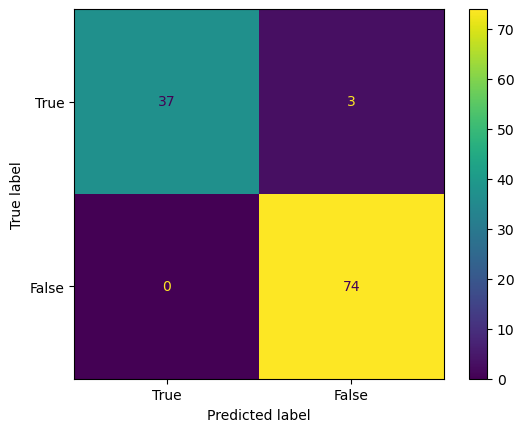

In [235]:
# To show the confusion matrix 
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

conf_matrix = confusion_matrix(y_test,y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= [True, False])
cm_display.plot()
plt.show()

##### Randomized Search CV

In [240]:
# Instantiate the RandomizedSearchCV object: tree_cv

from sklearn.model_selection import RandomizedSearchCV
rand_search_cv = RandomizedSearchCV(clf,param_distributions = param_dist,cv=4 )

In [241]:
rand_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=4, max_features=7,
                                                    min_samples_split=5),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None],
                                        'max_features': [6, 7, 8],
                                        'min_samples_split': [4, 5, 6, 7]})

In [242]:
rand_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=6, min_samples_split=6)

In [243]:
rand_search_cv.best_score_

0.9384994566061171

In [260]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=6,min_samples_split=6, random_state=2)
clf.fit(X_train, y_train)
random_search_pred = clf.predict(X_test)
random_search_pred
#accuracy_score(y_true, y_pred, normalize=False)
random_search_cv_accuracy = accuracy_score(y_test,random_search_pred)
print('Random Search CV : ', random_search_cv_accuracy)

Random Search CV :  0.9385964912280702


##### Check other accuracy parameter

In [261]:
compare_Accuracy = pd.DataFrame(y_test)
compare_Accuracy['predicted value'] = y_pred
compare_Accuracy

,target,predicted value
350,1,1
259,0,0
115,1,1
60,1,1
275,1,1
...,...,...
358,1,1
360,1,1
530,1,1
261,0,0


In [262]:
compare_Accuracy.to_excel('Test_Result.xlsx', sheet_name = 'accuracy2')

In [263]:
writer = pd.ExcelWriter('Test_Result.xlsx', engine = 'xlsxwriter')
df.to_excel(writer, sheet_name = 'x1')
compare_Accuracy.to_excel(writer, sheet_name = 'Accuracy_2')
X_test.to_excel(writer,sheet_name = 'TestDataSet')
writer.save()
writer.close()

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


 We can also export the tree in Graphviz format using the export_graphviz exporter.

In [264]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


###### Export the Tree Image in PDF

[Text(0.5972222222222222, 0.9, 'X[23] <= 884.55\nentropy = 0.957\nsamples = 455\nvalue = [172, 283]'),
 Text(0.3055555555555556, 0.7, 'X[6] <= 0.098\nentropy = 0.443\nsamples = 304\nvalue = [28, 276]'),
 Text(0.16666666666666666, 0.5, 'X[18] <= 0.017\nentropy = 0.178\nsamples = 261\nvalue = [7, 254]'),
 Text(0.1111111111111111, 0.3, 'X[21] <= 29.575\nentropy = 0.361\nsamples = 102\nvalue = [7, 95]'),
 Text(0.05555555555555555, 0.1, 'entropy = 0.162\nsamples = 84\nvalue = [2, 82]'),
 Text(0.16666666666666666, 0.1, 'entropy = 0.852\nsamples = 18\nvalue = [5, 13]'),
 Text(0.2222222222222222, 0.3, 'entropy = 0.0\nsamples = 159\nvalue = [0, 159]'),
 Text(0.4444444444444444, 0.5, 'X[23] <= 736.4\nentropy = 1.0\nsamples = 43\nvalue = [21, 22]'),
 Text(0.3333333333333333, 0.3, 'X[21] <= 30.865\nentropy = 0.722\nsamples = 20\nvalue = [4, 16]'),
 Text(0.2777777777777778, 0.1, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.3888888888888889, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [4

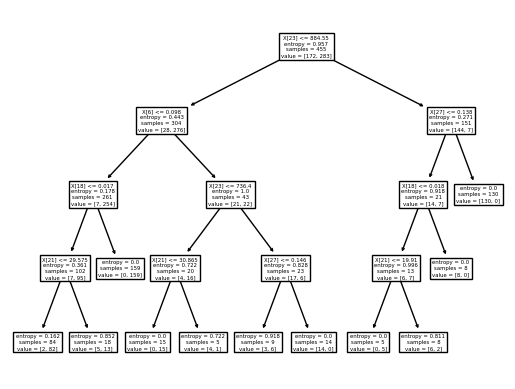

In [267]:
sklearn.tree.plot_tree(clf)